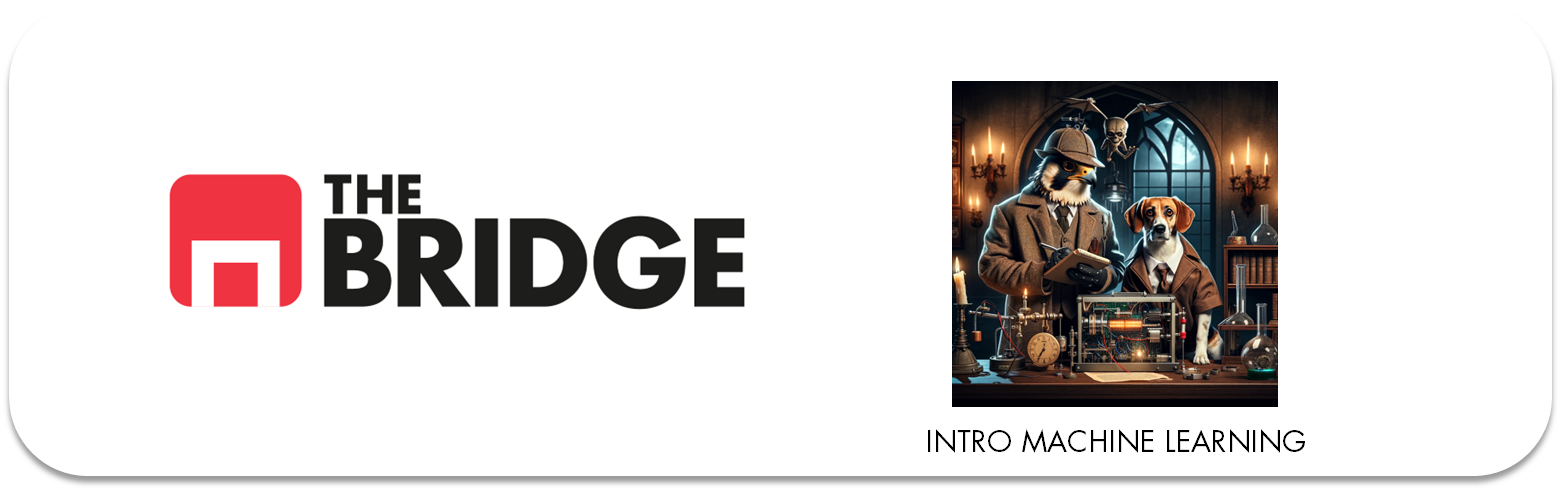

*NOTA: [Adaptado de "Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow" de Aurelien Geron]*

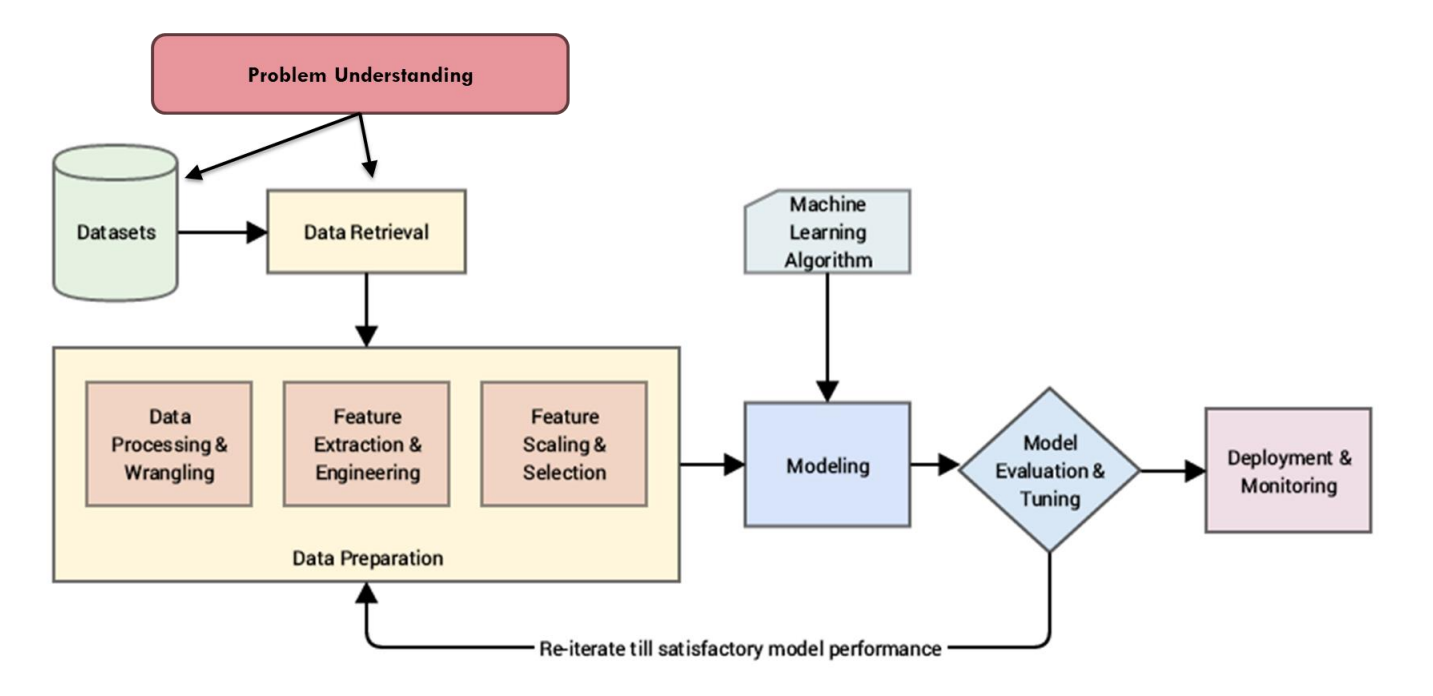

**RESUMEN ETAPAS**

## Flujo de un proyecto de Machine Learning

1. **Problema de negocio → Problema técnico**
   - Traducir la necesidad del negocio a un problema abordable con datos.

2. **Definir el tipo de problema (en este caso es una predicción)**
   - **Supervisado**: Regresión (objetivo numérico) o Clasificación (objetivo categórico).  
   - **No supervisado**: *Clustering*, reducción de dimensionalidad o detección de anomalías, generación de textos, análisis de textos, etc.

3. **Acceso e Ingesta de datos** 
   - Fuentes: BBDD (SQL/NoSQL), APIs, Web Scraping o archivos (CSV, JSON).

4. **Separación de datos: TRAIN / TEST (/ VALIDACIÓN (Deep Learning))** 
   - El conjunto TEST simula datos que el modelo "no conoce".
   - **Crucial**: Realizar el split antes del análisis profundo para evitar el *data leakage*.  
   - Uso de división **estratificada** en clasificación para mantener la proporción de clases.

5. **EDA (Análisis Exploratorio de Datos) sobre TRAIN** 
   - Análisis estadístico y visual del **target**.  
   - Detección de correlaciones, valores nulos y *outliers*.  
   - Selección y creación de features.
   - Comprensión del funcionamiento del modelo y explicabilidad.
   - **Feature Engineering**: Creación de nuevas variables basadas en el conocimiento del dominio.
   

6. **Limpieza y Transformación (Preprocesamiento)**
   - Imputación de nulos y gestión de *outliers* (usando estadísticas calculadas **solo en TRAIN**).  
   - **Encoding**: Convertir variables categóricas a numéricas (OneHot, Ordinal).  
   - **Escalado**: Normalización o estandarización (necesario para modelos como KNN, SVM o Redes Neuronales).

7. **Selección de modelos y métricas (Baseline)** 
   - Establecer un **modelo base** simple.  
   - Definir métricas de éxito: RMSE, MAE (Regresión) o Accuracy, Precision, Recall, F1-Score (Clasificación).

8. **Entrenamiento y Validación Cruzada (Cross-Validation)**
   - Entrenamiento de modelos candidatos.  
   - Uso de *K-Fold Cross-Validation* para asegurar que el rendimiento sea estable y no dependa de un solo split.

9. **Optimización de Hiperparámetros**
   - Búsqueda del mejor conjunto de parámetros mediante *Grid Search*, *Random Search* o *Bayesian Optimization*.  
   - Aplicación de **Regularización** (L1, L2) para controlar el *overfitting* y mejorar la generalización.

10. **Evaluación final en TEST**
    - Evaluación única con el conjunto de datos retenido al principio.  
    - Diagnóstico final: Comparación **Error Train vs. Error Test**.  
    - Si el error en Test es significativamente mayor, existe **overfitting**.



## ML INTRO PRACTICA (I): Fase Inicial 

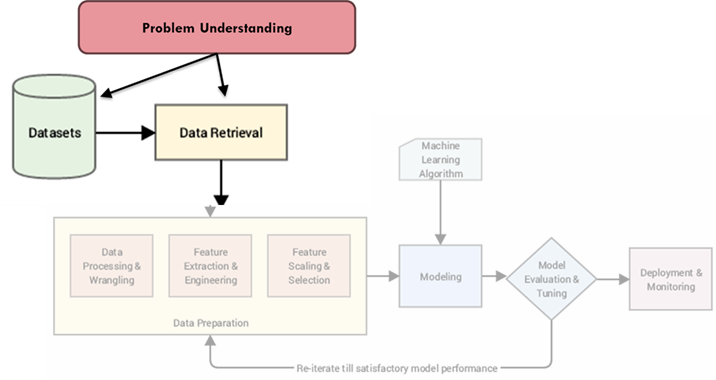

1. Lo primero es saber qué queremos resolver: Problema de negocio vs Problema técnico

2. Lo siguiente es entender que datos tenemos y podemos tener

3. Distinguir entre feature y target

4. Separar entre Train y Test

### 1. El problema de "Negocio"

En nuestro caso la compañía "California Real State Investment Funds" quiere mejorar sus inversiones inmobiliarias para fondos privados. Para ello quiere mejorar su estimación de precios de posibles adquisiciones de viviendas y así escoger mejor sus inversiones y negociar también con ventaja en la adquisición. En concreto le gustaría saber cuál podría ser el precio medio de una casa en una zona de California determinada por una serie de características como su localización, antigüedad media de las casas de la zona, población de la zona, etc.

**Tendremos que traducir nuestro problema de negocio en un problema técnico**

En este caso, parece claro que queremos predecir el precio medio de una casa en una zona determinada. Pero, no vale solo con eso, tendremos que saber en función de qué factores (features) concretos (no sólo una lista "vaga" o "incompleta"), con que margen de error tendríamos un modelo aceptable es decir una métrica de evaluación, tendremos que definir que tipo de aprendizaje (supervisado o no supervisado, por refuerzo...), etc, etc. ¿Cómo se obtiene esto? Preguntando y deduciendo. Lo iremos haciendo poco a poco. Supongamos que ya nos ha contestado al objetivo de negocio y además nos han dicho que nuestro sistema debe ayudar a los analistas de precios que luego introducirán el dato en otro sistema. Estos analistas ya tienen su propia forma de hacer los cálculos, con lo que podrán servirnos como "modelo de referencia" o baseline... Pero son muchas cosas... vayamos por partes... 


Hagamos nuestra cheklist:

* Objetivo de negocio [X] check
* Objetivo tecnico [X] check
* Tipo de modelado (supervisado, no supervisado) [] pending
* Features [] pending
* Target, si hay [] pending
* Tipo de problema (clasificación, regresión, etc) [] pending
* Métrica de Evaluacion [] pending
* Separación Train-Test [] pending


Preguntamos y "California Real State Investment Funds" posee un dataset de muchas zonas con sus precios reales. Y además nos dice que las variables de ese dataset puede tenerlas para cualquier zona futura que quiera valorar.

Pues manos a la obra, hay que conseguir los datos...

### 2. Obtener los datos y echar "un primer vistazo"

Para simplificar este ejemplo, suponemos que tenemos acceso directo a los datos que ese encuentra en un fichero. Es hora de leerlo y antes de importar nuestras librerías (observa que hay un nuevo jugador de equipo):

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms

pd.options.mode.copy_on_write = True

# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
df_inmo = pd.read_csv("./data/ejemplo_housing.csv")

Como siempre, echaremos un vistazo, pero ojo no podemos hacer más antes de separar en train y test para no "contaminar" nuestro modelo.

In [5]:
df_inmo.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY


En este momento deberíamos hacernos nuestra tabla con definiciones, tipo de columna y prioridades... Si estuvieramos haciendo un EDA. Ahora nos llega con la definición y con el tipo de variable. Por simplicidad y tiempo no lo vamos a hacer aquí con detalle. Simplemente ver que la mayoría de las variables o columnas son de tipo numérico continuo salvo esa última "OCEAN_PROXIMITY" a la que echaremos un ojo para entenderla mejor.

In [6]:
df_inmo.info()
# es mejor para nuestro modelo que sean números y no de tipo categórico, la tendremos que tratar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df_inmo["ocean_proximity"].value_counts() 
# vemos una breve descripción de la categórica  

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Tenemos cinco etiquetas, con frecuencias diferentes. Me lo apunto para luego. Veamos ahora de un golpe las variables numéricas:

In [8]:
df_inmo.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

Más que con los valores, con lo que nos quedamos es que son rangos muy variados (de miles, de dolares, en el "median_house_value", hasta unidades y decenas en "median_income"). Esto tendremos que tratarlo como veremos en un par de sesiones, porque a los algoritmos no le suelen sentar bien estas diferencias tan potentes.

Echemos un vistazo, y digo vistazo, porque todavía no podemos tomar números ni hacer análisis univariantes, simplemente veamos la pinta que tienen las variables.

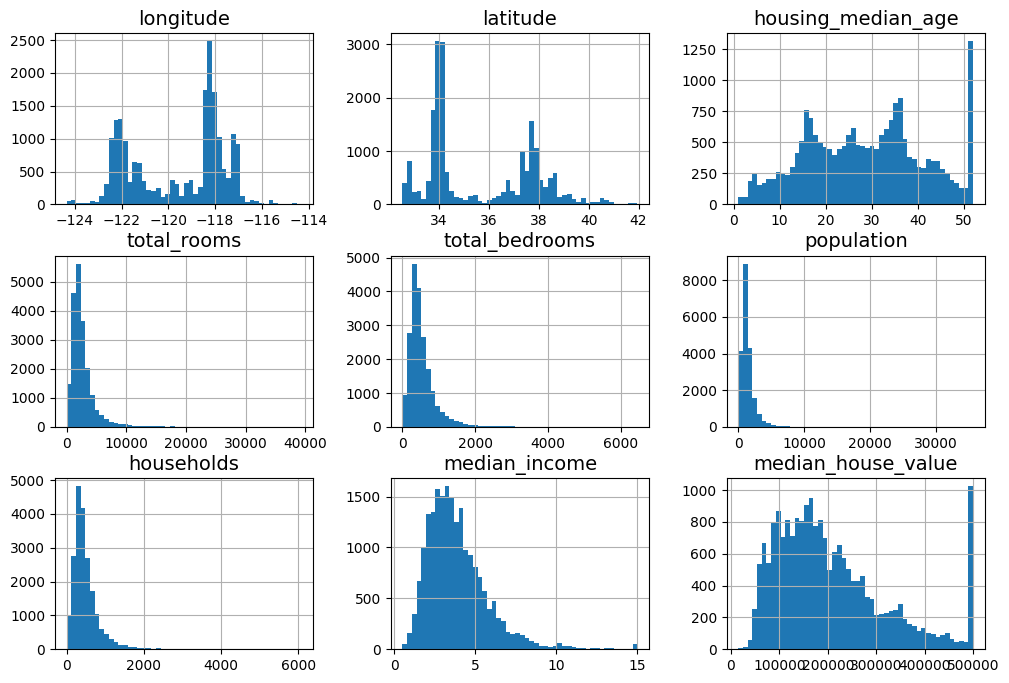

In [9]:

# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_inmo.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

# vemos las distruibuciones de los heavy tails,
# median income no está en dólares ni euros, tenemos que preguntar cuál es la moneda

Y aquí podemos ver:  

1- El ingreso medio ("median_income") esta claro que no está ni en dólares ni en euros. Tendríamos que preguntar a quien nos dio los datos. En este caso nos dirían que el ingreso se ha traducido a una escala de 0 a 15 (dividiendo por 10000 dolares pero además se han limitado las zonas con ingresos medios por encima de 150000 a 15)  
  
2- Existen más variables donde se han "capado" (puesto límite artificial) como "median_house_value" y "housing_median_age". Esto puede ser un problema porque el modelo puede aprender que no debe dar valores por encima de estos. Aquí hay que preguntar a los "jefes" que quieren hacer y tendremos que decidir (buscar los datos exactos para los capados o pasar de estos valores). Lo trataremos en la fase de tratamiento de Features.

3- Se ve que las escalas (ejes x) son muy diferentes como ya habíamos observado en los números.

4- Hay muchas distribuciones tipo "precio del billete" del Titanic, es decir desplazadas a la izquierda y con aparente larga cola. Esto también puede sentarle mal a nuestros algoritmos de modelado y en sprints posteriores veremos como "normalizar" las dsitribuciones de datos para que los algoritmos creen mejores modelos.

Pues hasta aquí el vistazo, no podemos hacer más si no queremos hacernos trampas. Es hora de separar los problemas de estudio de los problemas de examen. Es decir el train del test. Pero antes completemos nuestro checklist.

### 3. Target, Features, tipo de problema

En este caso tenemos una variable que es "claramente" nuestro target (es decir lo que querremos predecir para zonas nuevas): "mean_house_value". 

Además el tener target (la Y del modelo), nos dice que estamos tratando con un modelado supervisado. 

En principio las features serán el resto de variables, pero puede que luego nos descontemos alguna o transformemos otras. 

Y finalmente, queremos predecir una variable continua con lo que estaremos tratando con un problema de regresión.

En nuestra checklist:


* Objetivo de negocio [X] check
* Objetivo tecnico [X] check
* Tipo de modelado (supervisado, no supervisado): SUPERVISADO [X] check
* Features [] pending (aunque tengamos la base no tenemos las defintivas) 
* Target, si hay: "mean_house_value" [X] check
* Tipo de problema (clasificación, regresión, etc): Regresión [X] check
* Métrica de Evaluacion [] pending [podríamos elegirla ya pero lo dejamos para la fase de evaluación para no alargar la sesión demasiado]
* Separación Train-Test [] pending



### 4. Separar Train y Test

Necesitamos tener un dataset para entrenar, pero sobre todo necesitamos un dataset para poder tener una idea de como va a funcionar el modelo cuando le pasemos datos que no ha visto.


¿Y como se crea un set de Test? Generalmente generando dos muestras aleatorias del dataset de partida. Las cifras típicas son un 80% para train y un 20% para test y la forma de hacerlo rápidamente es acudir a la fución que nos hemos importado:

In [10]:
train_set, test_set = train_test_split(df_inmo, test_size=0.2, random_state=42)

In [11]:
y = df_inmo["median_house_value"].copy()
X = df_inmo.drop("median_house_value", axis = 1)

train_set_X, test_set_X, train_set_y, test_set_y = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
len(train_set)

16346

In [13]:
len(test_set)

4087

No podemos ver el test desgraciadamente :-).

Unicamente parece interesante convertir "mean_income" en una variable categórica, porque ya de por sí se ha intentado hacer un escalado con la misma. Esto es algo que ya hicimos varias veces cuando analizamos datos, recurriendo a la función `cut` de pandas. Hagámoslo:


<Axes: >

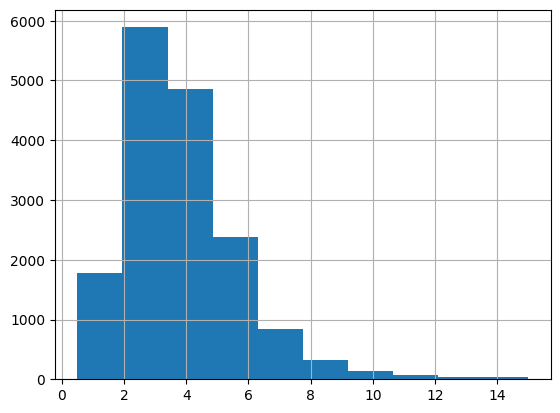

In [14]:
train_set["median_income"].hist()

In [15]:
train_set["income_cat"] = pd.cut(train_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

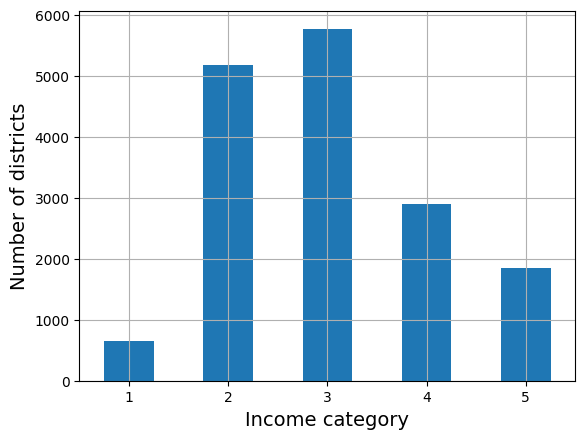

In [16]:
train_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [17]:
test_set["income_cat"] = pd.cut(test_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
train_set["income_cat"].value_counts(True)

income_cat
3    0.353053
2    0.317019
4    0.176924
5    0.112994
1    0.040010
Name: proportion, dtype: float64

In [19]:
test_set["income_cat"].value_counts(True)

income_cat
3    0.338879
2    0.326156
4    0.175924
5    0.119892
1    0.039149
Name: proportion, dtype: float64

### Estratificado

In [20]:
df_inmo["income_cat"] = pd.cut(df_inmo["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

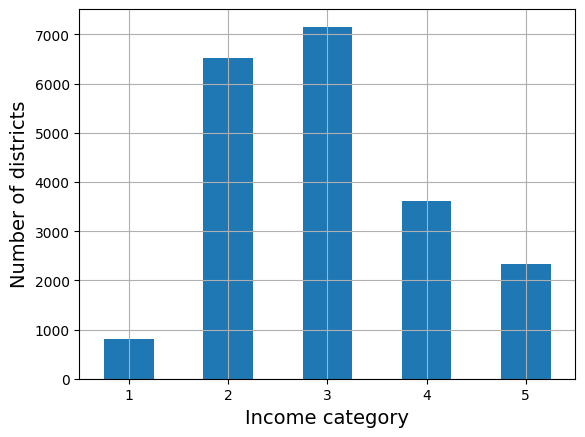

In [21]:
df_inmo["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [22]:
train_set, test_set = train_test_split(df_inmo, test_size= 0.2, random_state= 42, stratify= df_inmo["income_cat"])

In [23]:
train_set.income_cat.value_counts(True)

income_cat
3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: proportion, dtype: float64

In [24]:
test_set.income_cat.value_counts(True)

income_cat
3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: proportion, dtype: float64

In [25]:
len(train_set)

16346

### Mini-EDA

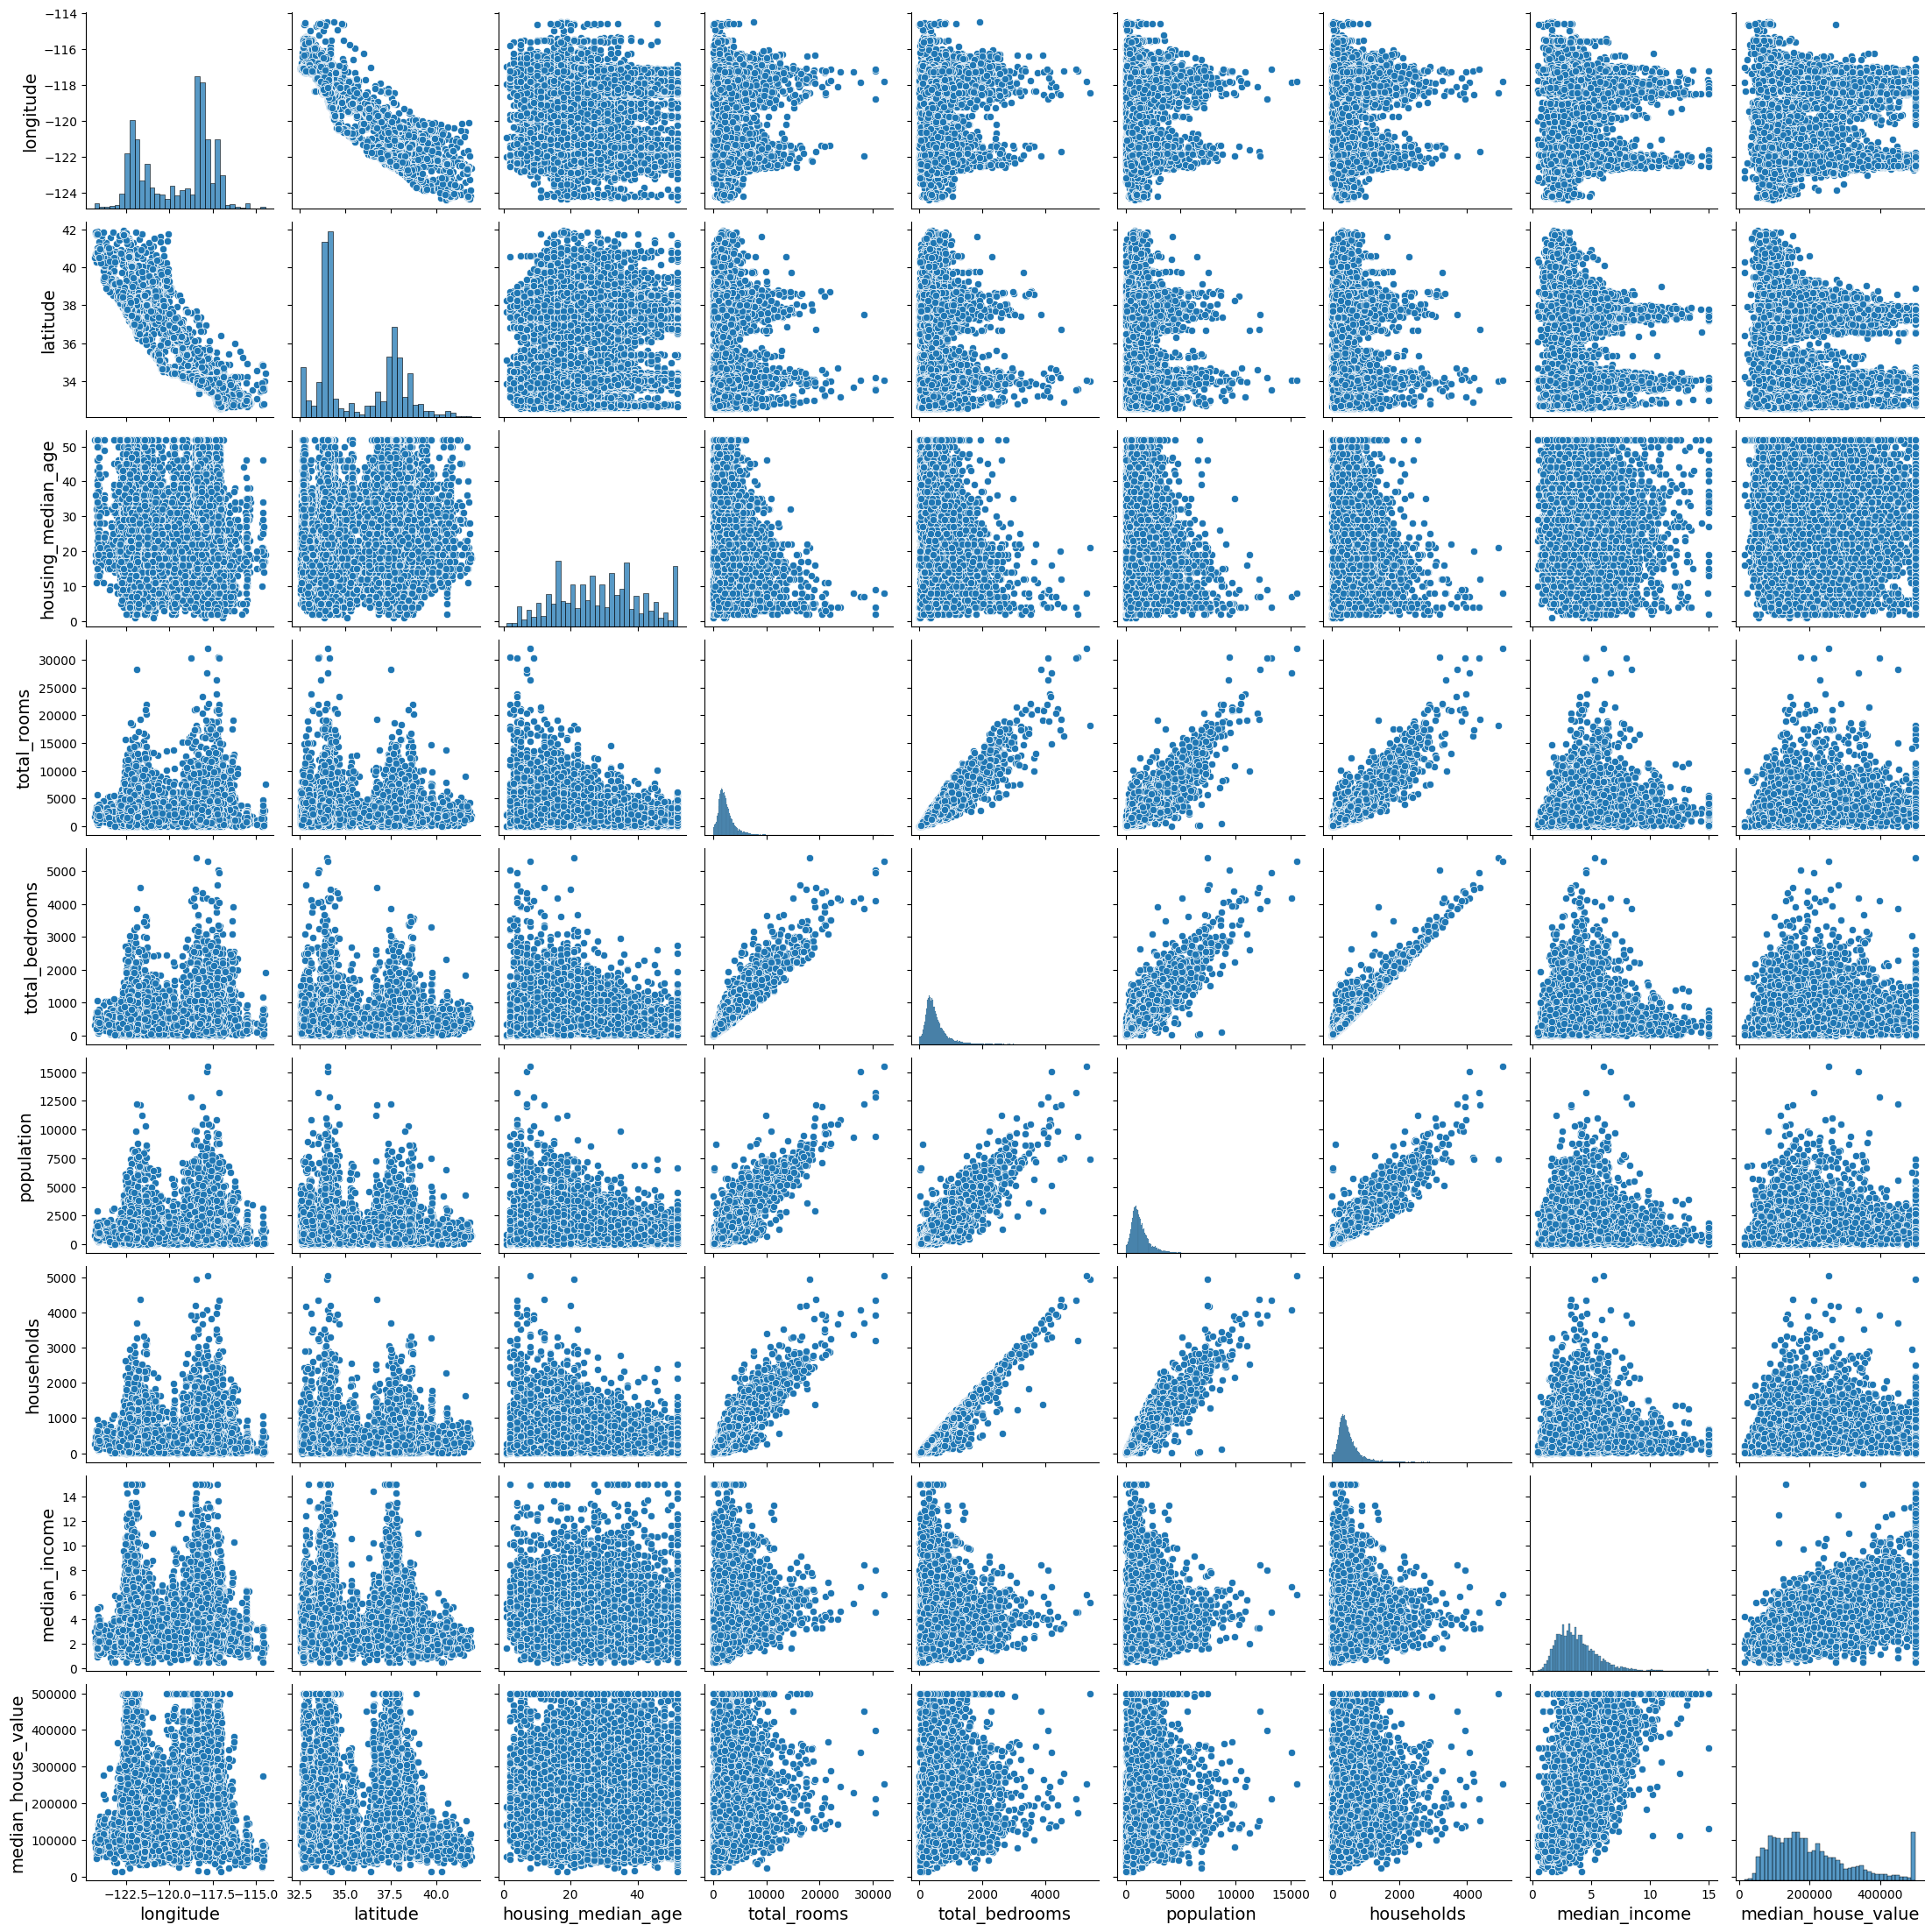

In [26]:
sns.pairplot(train_set)

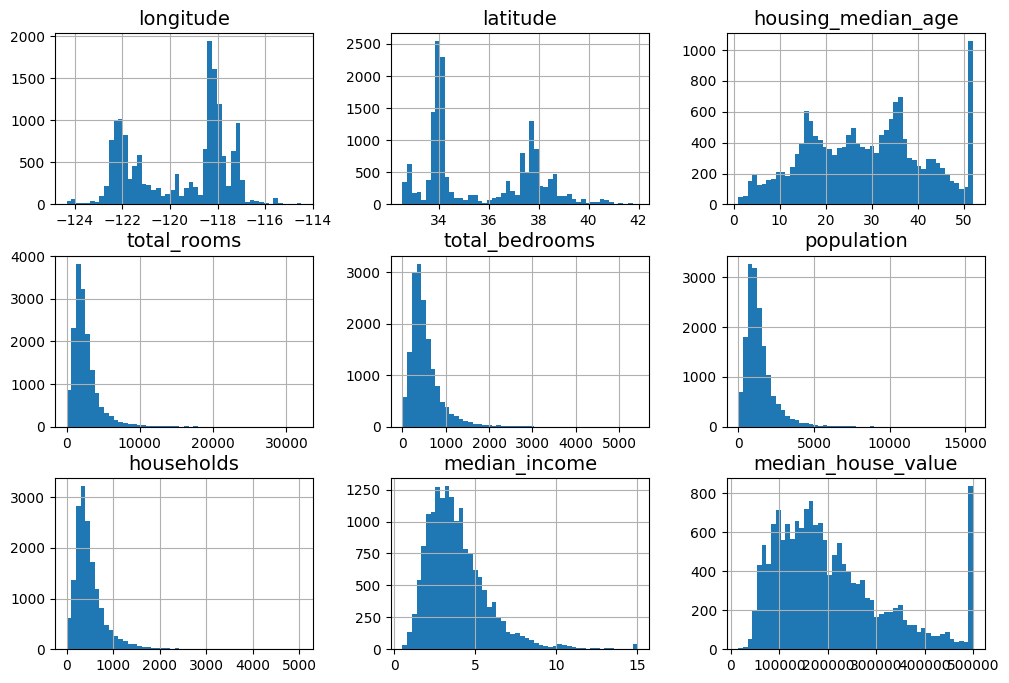

In [27]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [28]:
train_set["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     7183
INLAND        5230
NEAR OCEAN    2090
NEAR BAY      1840
ISLAND           3
Name: count, dtype: int64

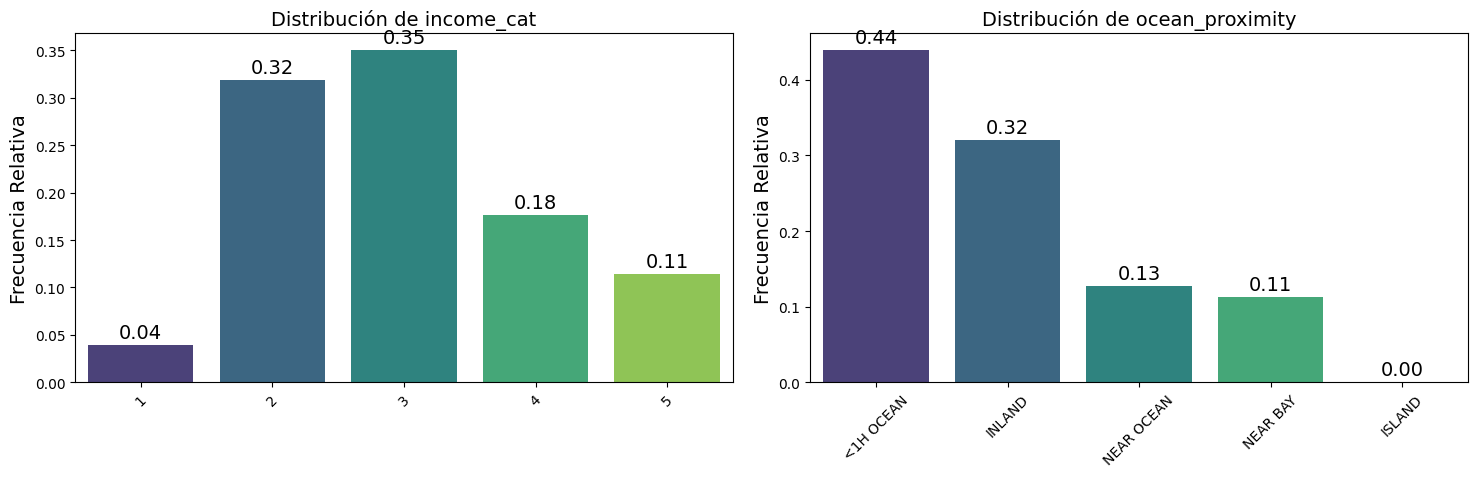

In [29]:
pinta_distribucion_categoricas(train_set, ["income_cat","ocean_proximity"], relativa= True, mostrar_valores= True)

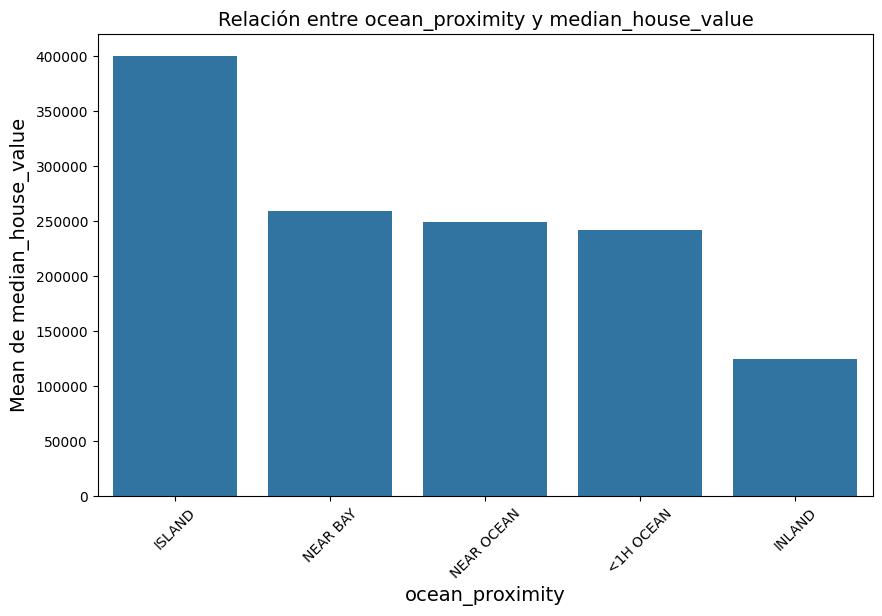

In [30]:
plot_categorical_numerical_relationship(train_set, categorical_col= "ocean_proximity", numerical_col="median_house_value")

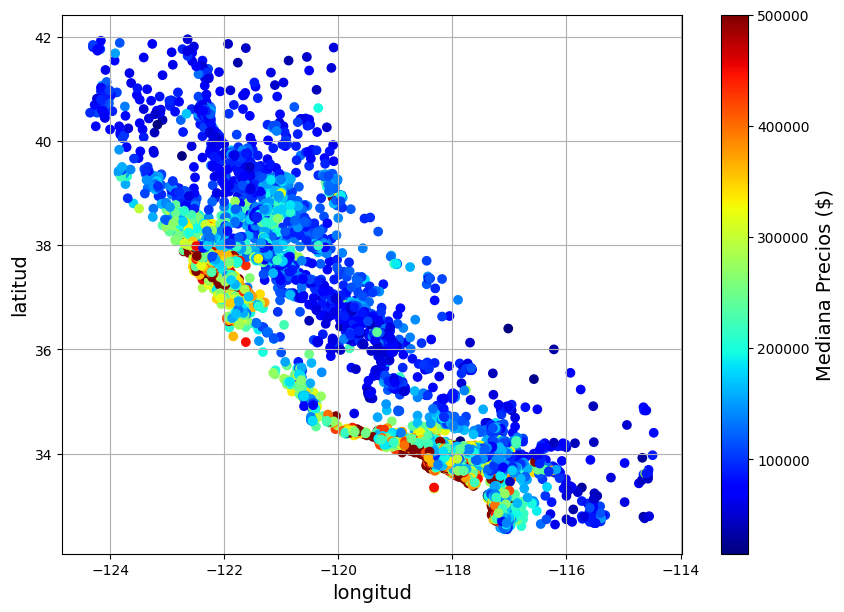

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(train_set["longitude"], train_set["latitude"], c = train_set["median_house_value"], cmap = "jet")
plt.grid()
plt.xlabel("longitud")
plt.ylabel("latitud")
cbar = plt.colorbar(label = "Mediana Precios ($)")

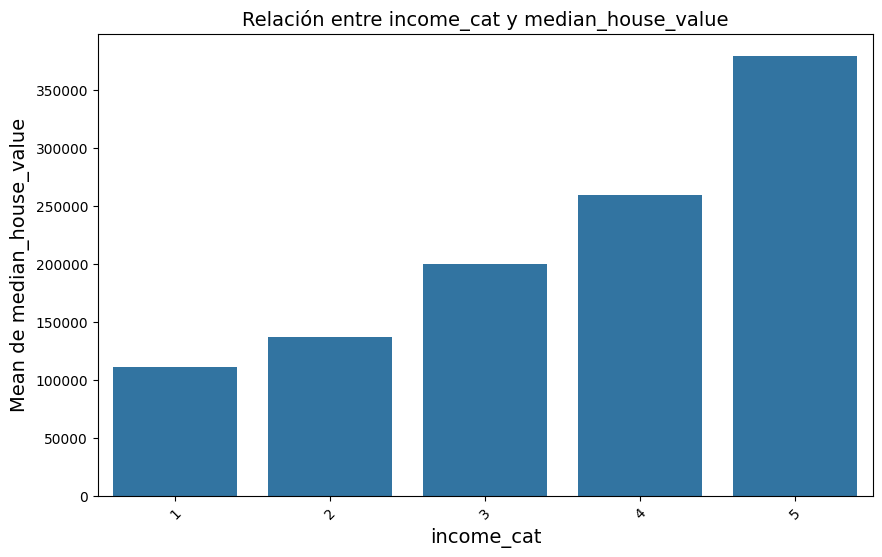

In [32]:
plot_categorical_numerical_relationship(train_set, categorical_col= "income_cat", numerical_col="median_house_value")

In [33]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690107
total_rooms           0.143421
housing_median_age    0.104802
households            0.075800
total_bedrooms        0.059607
population           -0.014545
longitude            -0.042341
latitude             -0.148180
Name: median_house_value, dtype: float64

In [34]:
columnas = corr_matrix["median_house_value"][corr_matrix["median_house_value"] > 0.07].index.to_list()

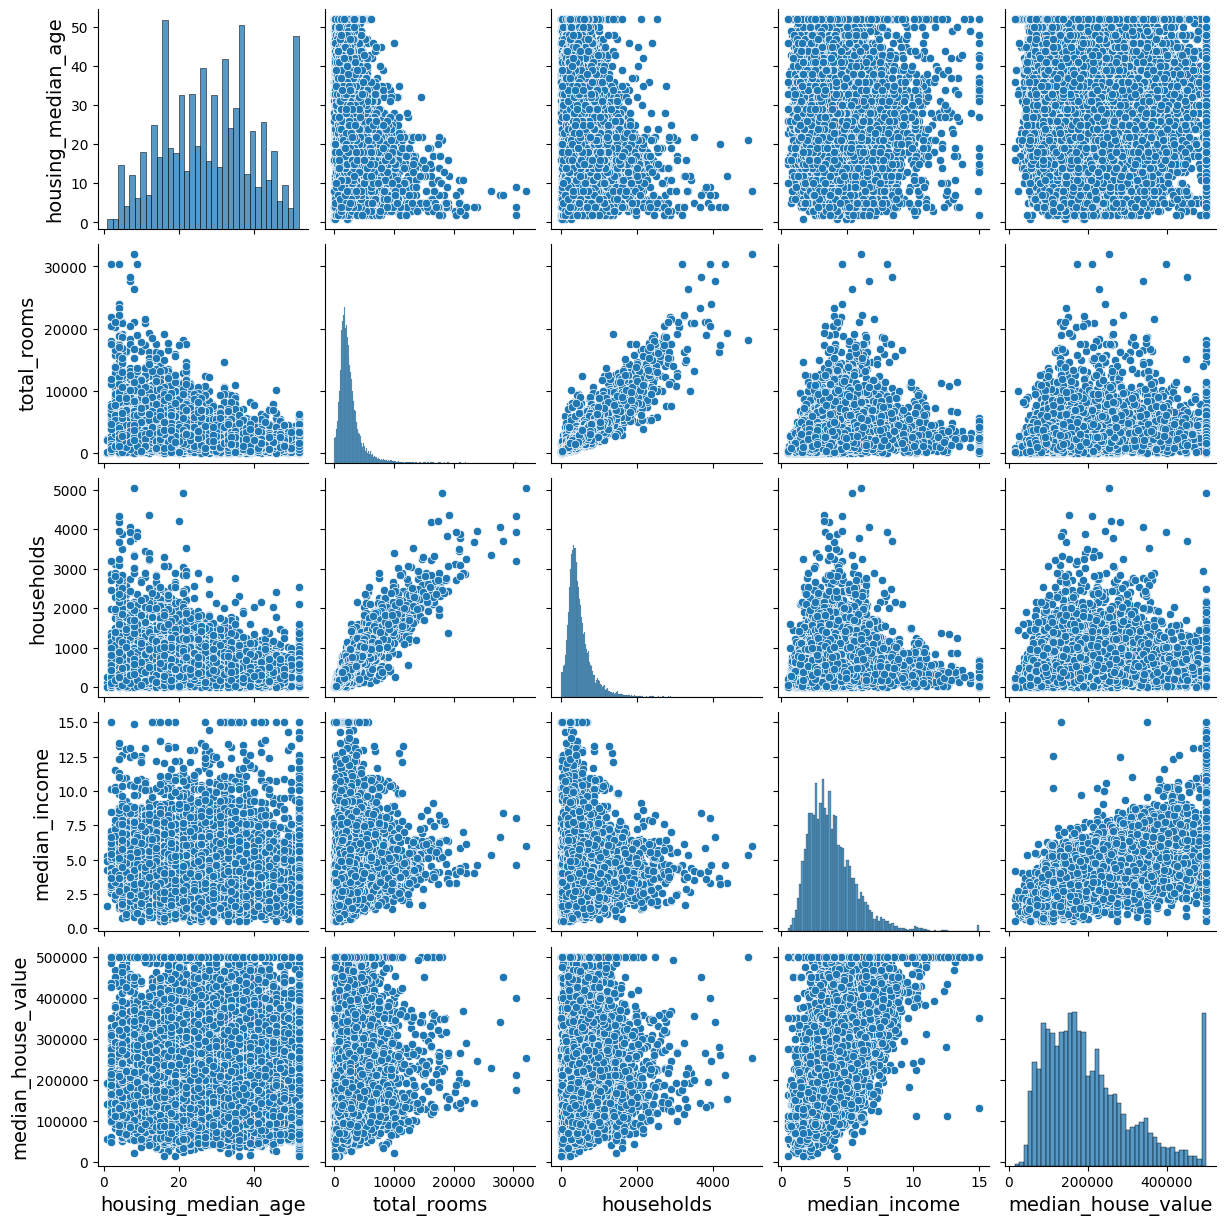

In [35]:
sns.pairplot(train_set[columnas]);

In [ ]:
# se han generado estas nuevas variables para enriquecer el dataset, a ver si tienen una correlación más alta con la variable objetivo, median_house_value  
train_set["rooms_per_house"] = train_set["total_rooms"] / train_set["households"] # creamos una nueva variable que es el número de habitaciones por hogar, y vemos si tiene una correlación más alta con la variable objetivo, median_house_value
train_set["bedrooms_ratio"] = train_set["total_bedrooms"] / train_set["total_rooms"]
train_set["people_per_house"] = train_set["population"] / train_set["households"]

In [ ]:
# con nuestra matriz de correlacion, vamos a cruzar las variables para ver si podemos crear nuevas variables que tengan una correlación más alta con la variable objetivo, median_house_value
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)
# viendo la matriz, las que mas influyen son las que los valores estan en los extremos, o sea por encima de 0.07, 
# las negativas pueden seguir influyendo en el modelo, no las descartamos a priori, pero no las vamos a cruzar para crear nuevas variables

median_house_value    1.000000
median_income         0.690107
rooms_per_house       0.144667
total_rooms           0.143421
housing_median_age    0.104802
households            0.075800
total_bedrooms        0.059607
population           -0.014545
people_per_house     -0.032066
longitude            -0.042341
latitude             -0.148180
bedrooms_ratio       -0.252394
Name: median_house_value, dtype: float64

In [38]:
### Features iniciales


features = ["ocean_proximity", "income_cat", "rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
features_num = ["rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
target = "median_house_value"

### Tratamiento de variables categóricas

#### Ordinal Encoding

In [ ]:
# utilizamos ordinal encoding para la variable categórica ocean_proximity, 
# ya que no tiene un orden específico, pero el modelo necesita números para poder trabajar con ella
train_set["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7183
INLAND        5230
NEAR OCEAN    2090
NEAR BAY      1840
ISLAND           3
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

train_set["ordinal_ocean"] = ordinal_encoder.fit_transform(train_set[["ocean_proximity"]])
# se hace fit transform solamente en train_set y lo guarda, el test_set se transforma con el mismo encoder pero sin hacer fit, 
# para que no se modifique el encoder con los datos del test_set

In [41]:
train_set[["ordinal_ocean","ocean_proximity"]].sample(30)

ordinal_ocean ocean_proximity
739              0.0       <1H OCEAN
1812             0.0       <1H OCEAN
11577            1.0          INLAND
6865             1.0          INLAND
9090             0.0       <1H OCEAN
14914            3.0        NEAR BAY
15612            1.0          INLAND
15441            1.0          INLAND
12139            0.0       <1H OCEAN
7832             1.0          INLAND
11775            0.0       <1H OCEAN
17820            3.0        NEAR BAY
20362            1.0          INLAND
4515             1.0          INLAND
13848            1.0          INLAND
709              1.0          INLAND
11698            0.0       <1H OCEAN
2546             1.0          INLAND
19340            4.0      NEAR OCEAN
11824            0.0       <1H OCEAN
16758            1.0          INLAND
16255            0.0       <1H OCEAN
2713             0.0       <1H OCEAN
15026            0.0       <1H OCEAN
16502            0.0       <1H OCEAN
453              0.0       <1H OCEAN
17087            0.0       <1H OCEAN
9757             4.0      NEAR OCEAN
2260             1.0          INLAND
18836            0.0       <1H OCEAN

In [42]:
categories = [["ISLAND","NEAR OCEAN","NEAR BAY","<1H OCEAN","INLAND"]]

ordinal_encoder = OrdinalEncoder(categories= categories)

train_set["ordinal_ocean"] = ordinal_encoder.fit_transform(train_set[["ocean_proximity"]])

In [43]:
train_set.ordinal_ocean.value_counts()

ordinal_ocean
3.0    7183
4.0    5230
1.0    2090
2.0    1840
0.0       3
Name: count, dtype: int64

In [42]:
train_set[["ordinal_ocean","ocean_proximity"]].sample(30)

ordinal_ocean ocean_proximity
14554            3.0       <1H OCEAN
5002             3.0       <1H OCEAN
12024            4.0          INLAND
1373             2.0        NEAR BAY
10281            1.0      NEAR OCEAN
5046             1.0      NEAR OCEAN
10594            2.0        NEAR BAY
8341             4.0          INLAND
4813             2.0        NEAR BAY
16509            3.0       <1H OCEAN
17834            3.0       <1H OCEAN
14088            1.0      NEAR OCEAN
5940             1.0      NEAR OCEAN
11499            3.0       <1H OCEAN
12851            4.0          INLAND
14206            4.0          INLAND
3597             4.0          INLAND
13180            3.0       <1H OCEAN
19170            3.0       <1H OCEAN
2031             3.0       <1H OCEAN
1877             3.0       <1H OCEAN
2447             3.0       <1H OCEAN
4681             1.0      NEAR OCEAN
10930            3.0       <1H OCEAN
7003             1.0      NEAR OCEAN
7280             1.0      NEAR OCEAN
6937             3.0       <1H OCEAN
9416             1.0      NEAR OCEAN
19279            2.0        NEAR BAY
16520            2.0        NEAR BAY

#### One-hot encoding

In [44]:
# usamos one-hot encoding para que el modelo pueda trabajar con la variable categórica ocean_proximity, 
# ya que no tiene un orden específico, y el modelo necesita números para poder trabajar con ella
pd.get_dummies(train_set, columns=["ocean_proximity"]).head()
# get_dummies genera una nueva columna por cada categoría de la variable categórica, 
# y asigna un 1 o un 0 dependiendo de si esa fila pertenece a esa categoría o no, es decir, 
# si la fila pertenece a la categoría "ISLAND", la columna "ocean_proximity_ISLAND" tendrá un 1, 
# y el resto de las columnas generadas por get_dummies tendrán un 0, si la fila pertenece a la categoría "NEAR OCEAN", 
# la columna "ocean_proximity_NEAR OCEAN" tendrá un 1, y el resto de las columnas generadas por get_dummies tendrán un 0, 
# y así sucesivamente para cada categoría de la variable categórica ocean_proximity

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17371    -118.82     34.15                 9.0        655.0           110.0   
17521    -122.40     37.72                47.0       1167.0           250.0   
19022    -122.27     37.78                45.0       1169.0           263.0   
16921    -117.92     33.98                10.0      16414.0          2919.0   
9068     -117.20     33.12                18.0       4372.0           736.0   

       population  households  median_income  median_house_value income_cat  \
17371       222.0       109.0         7.8528            337500.0          5   
17521       953.0       253.0         4.2727            241900.0          3   
19022       723.0       286.0         3.9444            212900.0          3   
16921      8907.0      2714.0         6.1552            362500.0          5   
9068       1473.0       675.0         5.1194            247800.0          4   

       rooms_per_house  bedrooms_ratio  people_per_house  ordinal_ocean  \
17371         6.009174        0.167939          2.036697            1.0   
17521         4.612648        0.214225          3.766798            2.0   
19022         4.087413        0.224979          2.527972            2.0   
16921         6.047900        0.177836          3.281872            3.0   
9068          6.477037        0.168344          2.182222            1.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
17371                      False                   False   
17521                      False                   False   
19022                      False                   False   
16921                       True                   False   
9068                       False                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
17371                   False                     False   
17521                   False                      True   
19022                   False                      True   
16921                   False                     False   
9068                    False                     False   

       ocean_proximity_NEAR OCEAN  
17371                        True  
17521                       False  
19022                       False  
16921                       False  
9068                         True

In [ ]:
train_set_bck = train_set.copy()
train_set = pd.get_dummies(train_set, columns = ["ocean_proximity"], dtype = int) # aqui se hace el get_dummies y se asigna a train_set, 
# si no se asigna a una variable, el get_dummies no modifica el dataset original, 
# sino que devuelve un nuevo dataset con las columnas generadas por get_dummies, 
# por eso hay que asignarlo a una variable, en este caso a train_set para que el resto del código funcione 
# con el dataset modificado con las columnas generadas por get_dummies

In [46]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17371    -118.82     34.15                 9.0        655.0           110.0   
17521    -122.40     37.72                47.0       1167.0           250.0   
19022    -122.27     37.78                45.0       1169.0           263.0   
16921    -117.92     33.98                10.0      16414.0          2919.0   
9068     -117.20     33.12                18.0       4372.0           736.0   
...          ...       ...                 ...          ...             ...   
17615    -118.13     33.93                19.0       1793.0           447.0   
1747     -118.42     33.92                25.0       3521.0           852.0   
8827     -118.25     33.79                34.0       1349.0           371.0   
11504    -121.07     37.71                39.0        223.0            37.0   
11170    -118.16     34.04                22.0       2991.0           791.0   

       population  households  median_income  median_house_value income_cat  \
17371       222.0       109.0         7.8528            337500.0          5   
17521       953.0       253.0         4.2727            241900.0          3   
19022       723.0       286.0         3.9444            212900.0          3   
16921      8907.0      2714.0         6.1552            362500.0          5   
9068       1473.0       675.0         5.1194            247800.0          4   
...           ...         ...            ...                 ...        ...   
17615      1222.0       452.0         2.6862            195800.0          2   
1747       1524.0       764.0         3.8086            361300.0          3   
8827       1716.0       380.0         2.7143            138100.0          2   
11504        92.0        37.0         3.3750            212500.0          3   
11170      2486.0       754.0         1.5078            181900.0          2   

       rooms_per_house  bedrooms_ratio  people_per_house  ordinal_ocean  \
17371         6.009174        0.167939          2.036697            1.0   
17521         4.612648        0.214225          3.766798            2.0   
19022         4.087413        0.224979          2.527972            2.0   
16921         6.047900        0.177836          3.281872            3.0   
9068          6.477037        0.168344          2.182222            1.0   
...                ...             ...               ...            ...   
17615         3.966814        0.249303          2.703540            3.0   
1747          4.608639        0.241977          1.994764            3.0   
8827          3.550000        0.275019          4.515789            1.0   
11504         6.027027        0.165919          2.486486            4.0   
11170         3.966844        0.264460          3.297082            3.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
17371                          0                       0   
17521                          0                       0   
19022                          0                       0   
16921                          1                       0   
9068                           0                       0   
...                          ...                     ...   
17615                          1                       0   
1747                           1                       0   
8827                           0                       0   
11504                          0                       1   
11170                          1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
17371                       0                         0   
17521                       0                         1   
19022                       0                         1   
16921                       0                         0   
9068                        0                         0   
...                       ...                       ...   
17615                       0                         0   
1747           

In [47]:
train_set["income_cat"].value_counts(True)

income_cat
3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: proportion, dtype: float64

In [48]:
features_cat = [col for col in train_set.columns if "ocean_proximity" in col] + ["income_cat"]
features_cat # con esto, en vez de escribir a mano las columnas generadas por get_dummies, 
# las seleccionamos automáticamente con una lista por comprensión, y añadimos la variable income_cat 
# que es la variable categórica que hemos creado a partir de median_income,
# para que el resto del código funcione con las columnas generadas por get_dummies 
# y la variable income_cat, sin tener que escribir a mano cada una de las columnas generadas por get

['ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'income_cat']

### Tratamiento numéricas

#### Min-Max Scaling

$$
[0,1]\quad \hat{x}_i = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}}
$$

$$
[-1,1]\quad \hat{x}_i = 2\frac{x_i - x_{\min}}{x_{\max} - x_{\min}} - 1
$$

$$
[a,b]\quad \hat{x}_i = (b-a)\frac{x_i - x_{\min}}{x_{\max} - x_{\min}} + a
$$


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_num = ["rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # con esto, el MinMaxScaler va a escalar 
# las variables numéricas para que estén entre -1 y 1, es decir, 
# el valor mínimo de cada variable numérica será -1, y el valor máximo será 1, 
# y el resto de los valores estarán escalados proporcionalmente entre -1 y 1

resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set[features_num]), columns= features_num)
resultado_min_max

rooms_per_house  total_rooms  housing_median_age  bedrooms_ratio
0            -0.926798    -0.959254           -0.686275       -0.849025
1            -0.946598    -0.927306            0.803922       -0.746168
2            -0.954045    -0.927181            0.725490       -0.722270
3            -0.926249     0.024086           -0.647059       -0.827031
4            -0.920165    -0.727318           -0.333333       -0.848124
...                ...          ...                 ...             ...
16341        -0.955755    -0.888244           -0.294118       -0.668216
16342        -0.946655    -0.780419           -0.058824       -0.684496
16343        -0.961665    -0.915949            0.294118       -0.611070
16344        -0.926545    -0.986210            0.490196       -0.853513
16345        -0.955755    -0.813491           -0.176471       -0.634533

[16346 rows x 4 columns]

In [50]:
resultado_min_max.describe()

rooms_per_house   total_rooms  housing_median_age  bedrooms_ratio
count     16346.000000  16346.000000        16346.000000    16346.000000
mean         -0.934956     -0.835624            0.083793       -0.749071
std           0.035830      0.134105            0.493885        0.129153
min          -1.000000     -1.000000           -1.000000       -1.000000
25%          -0.948969     -0.909881           -0.333333       -0.832600
50%          -0.937710     -0.867403            0.098039       -0.771222
75%          -0.926181     -0.803569            0.411765       -0.689815
max           1.000000      1.000000            1.000000        1.000000

#### Standardization

$$x_i = \dfrac{x - \bar x}{s_x}\ \text{,donde } s_x \text{ es la desviación estándar de la variable numérica}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
#std_scaler.fit(train_set[features_num])

resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)
resultado_standardization.head()
# estandarizamos para que el valor medio de cada variable numérica sea 0, 
# y la desviación estándar sea 1, es decir, cada variable numérica tendrá un valor medio de 0 
# y una desviación estándar de 1

rooms_per_house  total_rooms  housing_median_age  bedrooms_ratio
0         0.227669    -0.921912           -1.559253       -0.773940
1        -0.324952    -0.683673            1.458134        0.022478
2        -0.532794    -0.682743            1.299324        0.207520
3         0.242993     6.410896           -1.479848       -0.603645
4         0.412808     0.807643           -0.844609       -0.766970

In [52]:
resultado_standardization.describe()

rooms_per_house   total_rooms  housing_median_age  bedrooms_ratio
count     1.634600e+04  1.634600e+04        1.634600e+04    1.634600e+04
mean     -1.151926e-17 -2.955886e-17       -1.630084e-17    1.721369e-16
std       1.000031e+00  1.000031e+00        1.000031e+00    1.000031e+00
min      -1.815397e+00 -1.225759e+00       -2.194493e+00   -1.942939e+00
25%      -3.911216e-01 -5.537357e-01       -8.446088e-01   -6.467622e-01
50%      -7.686551e-02 -2.369764e-01        2.884537e-02   -1.715193e-01
75%       2.448887e-01  2.390349e-01        6.640848e-01    4.588176e-01
max       5.400482e+01  1.368833e+01        1.855159e+00    1.354302e+01

#### Transformacion distribuciones

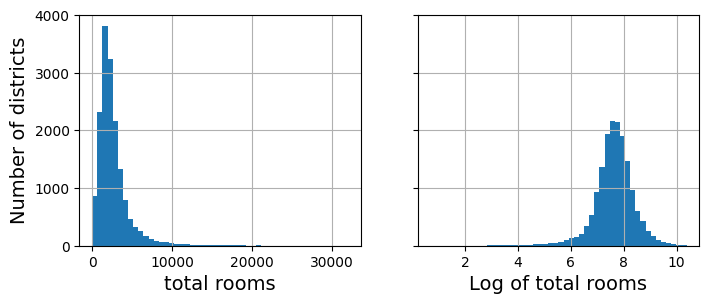

In [53]:

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["total_rooms"].hist(ax=axs[0], bins=50)
train_set["total_rooms"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("total rooms")
axs[1].set_xlabel("Log of total rooms")
axs[0].set_ylabel("Number of districts")
plt.show()

In [54]:

for col in ["rooms_per_house","total_rooms","bedrooms_ratio"]:
    train_set[f"log_{col}"] = train_set[col].apply(np.log)
    train_set[col] = min_max_scaler.fit_transform(train_set[[f"log_{col}"]])

train_set["housing_median_age"] = min_max_scaler.fit_transform(train_set[["housing_median_age"]])

array([[<Axes: title={'center': 'rooms_per_house'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'bedrooms_ratio'}>]], dtype=object)

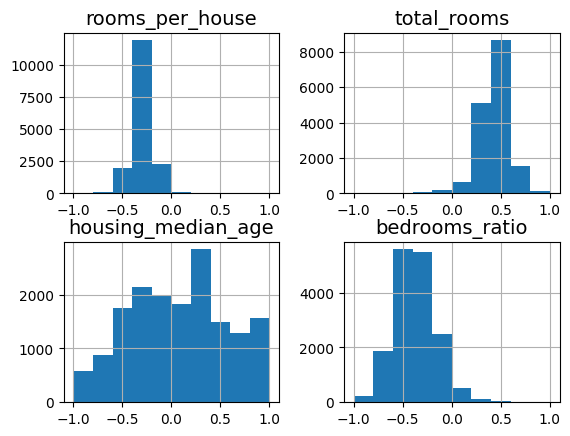

In [55]:
f_num = ["rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
train_set[f_num].hist()

### Modelado

In [56]:
features

['ocean_proximity',
 'income_cat',
 'rooms_per_house',
 'total_rooms',
 'housing_median_age',
 'bedrooms_ratio']

Oye antes del modelo si yo ahora te digo que una zona tiene:
inland, 3, 2.5, 5, 23, 1.2 -> min()

In [57]:
train_set.median_house_value.mean()

np.float64(207112.11837758473)

In [58]:
from sklearn.metrics import root_mean_squared_error #RMSE #MSE

In [59]:
y_pred = 2500 * train_set["rooms_per_house"]
# esto es un ejemplo de una predicción, no es un modelo, es una predicción muy básica, 
# pero sirve para calcular el RMSE y ver cómo de lejos estamos de la realidad, 
# y así tener una referencia para comparar con modelos más complejos que vamos a crear después

In [60]:
root_mean_squared_error(train_set["median_house_value"],y_pred)
# aqui lo que calcula es el RMSE, que es la raíz cuadrada del error cuadrático medio, es decir,
# la media de las diferencias al cuadrado entre los valores reales y las predicciones,
# y luego se le saca la raíz cuadrada para que el resultado esté en las mismas unidades 
# que la variable objetivo, median_house_value, y así poder interpretarlo mejor, 
# cuanto más bajo sea el RMSE, mejor será el modelo, ya que significa que las predicciones 
# están más cerca de los valores reales, y cuanto más alto sea el RMSE, peor será el modelo, 
# ya que significa que las predicciones están más lejos de los valores reales

237980.49679797882

BASELINE

In [ ]:
# Regresor Lineal

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Arboles de decisión para Regresión 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42) # Necesita una inicialización aleatoria y la semilla permite que siempre sea la misma

# el baseline es para comparar con modelos más complejos, es decir, es una referencia para ver 
# si los modelos que vamos a crear después son mejores que esta predicción tan básica, 
# si el RMSE del baseline es muy alto, cualquier modelo que hagamos después que tenga un RMSE menor, 
# será mejor que el baseline, y por tanto, será un modelo útil.

In [ ]:
features_cat = [col for col in train_set if col.startswith("ocean_proximity")] + ["income_cat"]
# aqui se seleccionan automáticamente las columnas generadas por get_dummies, que empiezan por "ocean_proximity",
# y se añade la variable income_cat que es la variable categórica que hemos creado a partir 
# de median_income, para que el resto del código funcione con las columnas generadas por get_d

In [ ]:
features = features_cat + features_num
# aqui se juntan las variables categóricas y las numéricas para tener una lista con 
# todas las variables que vamos a usar para entrenar el modelo,
# y así poder seleccionar esas columnas del dataset para entrenar el modelo.

In [64]:
X = train_set[features].copy() # ojo, es train, está bien
y= train_set[target] # ojo, es train, está bien

In [ ]:
lin_reg.fit(X,y) # aqui entrenamos el modelo de regresión lineal con las variables seleccionadas,
tree_reg.fit(X,y) # aqui entrenamos el modelo de árbol de decisión con las variables seleccionadas,

DecisionTreeRegressor(random_state=42)

¿Algua predicción en especial? (audience request :-))

### Evaluación contra Train (train_error):

In [66]:
# Primero las predicciones
train_pred_lin = lin_reg.predict(X)

train_pred_tree = tree_reg.predict(X)

In [ ]:
mse_lin = root_mean_squared_error(y, train_pred_lin) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(mse_lin)
# cuanto mas se acerque a 0, mejor, porque significa que las predicciones están más cerca de los valores reales, y cuanto más alto sea el RMSE, peor será el modelo,

77183.912535398


In [ ]:
mse_tree = root_mean_squared_error(y, train_pred_tree)
print(mse_tree) # overfitting!!!
# si el resultado es 0, debemos cuestionarnos si el modelo está sobreajustado, es decir, 
# i el modelo ha aprendido a predecir perfectamente los datos de entrenamiento, 
# pero no generaliza bien a nuevos datos, lo que se conoce como overfitting, 
# y es un problema común en modelos muy complejos como los árboles de decisión, 
# que pueden aprender a predecir perfectamente los datos de entrenamiento, 
# pero no generalizan bien a nuevos datos, por eso es importante evaluar el modelo con datos 
# de prueba que no se han utilizado para entrenar el modelo, para ver cómo de bien generaliza 
# a nuevos datos.

# este modelo lo descartaríamos, porque seguramente nos hemos equivocado  por el camino.

0.0


### Validación Cruzada

Nosotros no hemos reservado datos para un set de validación porque hemos comentado que usaríamos validación cruzada. Y eso haremos. Básicamente vamos a reentrenar el los modelos con las dos técnicas elegidas con unos datasets de entrenamiento creados a partir del dataset completo de entrenamiento. Luego evaluaremos esos submodelos para cada ténica y la métrica será la media de las métricas para cada modelo.  

El proceso es el siguiente:

1. Dividiremos el dataset de train en "k" grupos (depende del total de datos que tengamos). 

2. Entrenaremos un modelo para cada combinación de k-1 grupos posibles (si tengo k = 5 por ejemplo tendré 5 posibles combinaciones, ver la tabla más abajo). Evaluaremos con el grupo restante.

3. La métrica a considerar será la media de las obtenidas en cada uno de las evaluaciones hechas.


| Ronda     | Fold 1    | Fold 2    | Fold 3    | Fold 4    | Fold 5    |
|-----------|-----------|-----------|-----------|-----------|-----------|
| 1         | Test      | Training  | Training  | Training  | Training  |
| 2         | Training  | Test      | Training  | Training  | Training  |
| 3         | Training  | Training  | Test      | Training  | Training  |
| 4         | Training  | Training  | Training  | Test      | Training  |
| 5         | Training  | Training  | Training  | Training  | Test      |


In [ ]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, X, y,
                              scoring="neg_root_mean_squared_error", cv=10) # k = 10)
print(lin_rmses)
pd.Series(lin_rmses).describe()

# la validación cruzada nos da una mejor idea de cómo de bien generaliza el modelo a nuevos datos,
# ya que se entrena y se evalúa el modelo varias veces con diferentes particiones de los datos, 
# y se obtiene una distribución de los RMSEs obtenidos en cada partición,
# lo que nos permite ver cómo de estable es el modelo, y si hay alguna partición en la que el modelo 
# no generaliza bien, lo que podría indicar que el modelo está sobreajustado, o que hay algún problema 
# con los datos en esa partición, por eso es importante evaluar el modelo con validación cruzada, 
# para tener una mejor idea de cómo de bien generaliza

[76414.9791569  73907.67702788 78558.51840914 76062.98831396
 75978.29832281 77221.30259421 80142.88743541 79500.89924804
 78377.94727179 76204.23377734]


count       10.000000
mean     77236.973156
std       1897.577073
min      73907.677028
25%      76098.299680
50%      76818.140876
75%      78513.375625
max      80142.887435
dtype: float64

In [ ]:
tree_rmses = -cross_val_score(tree_reg, X, y,
                              scoring="neg_root_mean_squared_error", cv=10) # k = 10
print(tree_rmses)
pd.Series(tree_rmses).describe()

[ 95734.11600509  96852.89976036 101699.52683142  96065.30662939
  94945.8637771   97783.37040252 101613.79460751 102168.76010939
  96649.68321998  98065.57858891]


count        10.000000
mean      98157.889993
std        2693.009854
min       94945.863777
25%       96211.400777
50%       97318.135081
75%      100726.740603
max      102168.760109
dtype: float64

### Evaluación contra test (test_error)

In [ ]:
test_set["income_cat"] = pd.cut(test_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

test_set["rooms_per_house"] = test_set["total_rooms"] / test_set["households"]
test_set["bedrooms_ratio"] = test_set["total_bedrooms"] / test_set["total_rooms"]



target = "median_house_value"

# Procesado de variables categóricas
test_set = pd.get_dummies(test_set, columns = ["ocean_proximity"], dtype = int)

# Procesado de variables numéricas
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # ESTO NO ES FORMALMENTE CORRECTO, lo veremos en la sesión en vivo
for col in ["rooms_per_house","total_rooms","bedrooms_ratio"]:
    test_set[f"log_{col}"] = test_set[col].apply(np.log)
    test_set[col] = min_max_scaler.transform(test_set[[f"log_{col}"]]) # ¡ojo! debería ser transform

test_set["housing_median_age"] = min_max_scaler.transform(test_set[["housing_median_age"]]) # ¡ojo! debería ser transform


# Features finales
features = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', "income_cat", "rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]


X_test = test_set[features].copy()
y_test = test_set[target]




In [71]:
test_predict = lin_reg.predict(X_test)
mse_lin_test = root_mean_squared_error(y_test, test_predict)
print(mse_lin_test)

75697.80970098067


In [72]:
test_predict = tree_reg.predict(X_test)
mse_tree_test = root_mean_squared_error(y_test, test_predict)
print(mse_tree_test)

104807.54336162264


### Overfitting, Underfitting, Bias, Variance

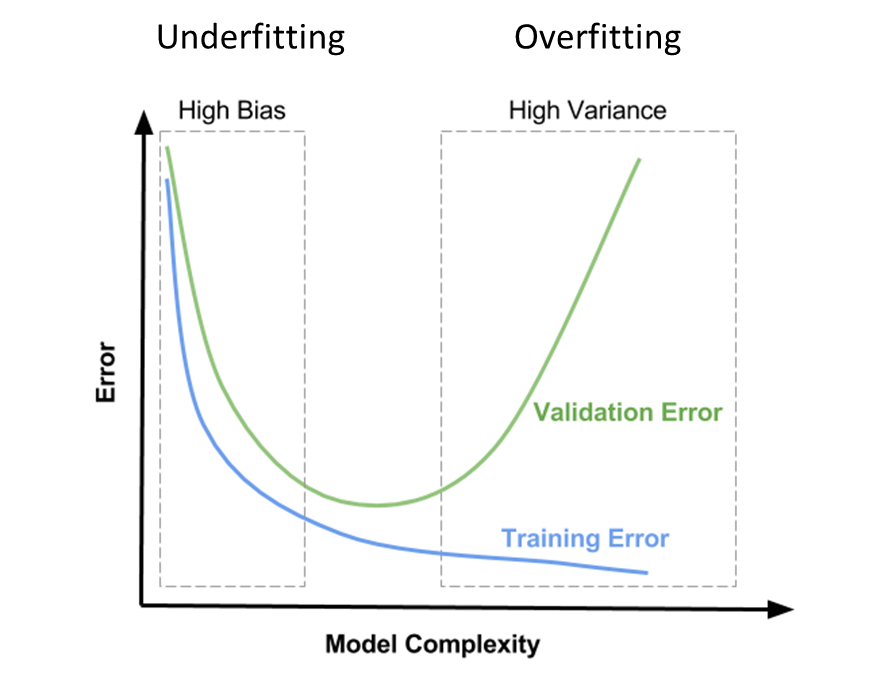

**Overfitting**: Ocurre cuando un modelo de aprendizaje automático se entrena demasiado bien con los datos de entrenamiento, memorizándolos en lugar de aprender de ellos. Esto lleva a una mala generalización a nuevos datos.  

**Underfitting**: Sucede cuando un modelo es demasiado simple para capturar la estructura de los datos, resultando en un rendimiento pobre tanto en entrenamiento como en generalización.  

**Bias**: Error por simplificación excesiva, asumiendo relaciones más simples de lo que realmente son, lo que conduce a underfitting.  
  
**Variance**: Error por complejidad excesiva, prestando demasiada atención a los datos de entrenamiento, incluido el ruido, lo que lleva a overfitting.  
  
**Trade-off Bias/Variance**: Equilibrio entre bias y variance. Se busca un modelo con bajo bias (capaz de capturar la verdadera relación) y baja variance (que no sea excesivamente complejo), lo cual es clave para un modelo efectivo.


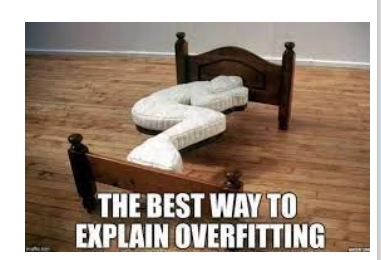